<b>Forecast the CocaCola prices. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks')

In [2]:
data = pd.read_excel(r'D:\Excelr Data Science assignment\Forecasting\CocaCola_Sales_Rawdata.xlsx',sheet_name='Sheet1')

In [3]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<b>EDA

In [4]:
data.shape

(42, 2)

In [5]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<b>DATA PREPRECESSING

In [8]:
data['Quater_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
data

,Quarter,Sales,Quater_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [9]:
data['Month'] = data['Quater_Year'].str.split(' ',expand=True)[0].apply(
                                                                        lambda x: 'Jan' if x=='Q1' else(
                                                                        'Apr' if x=='Q2' else(
                                                                        'Jul' if x=='Q3' else 'Oct')))
data

,Quarter,Sales,Quater_Year,Month
0,Q1_86,1734.827000,Q1 1986,Jan
1,Q2_86,2244.960999,Q2 1986,Apr
2,Q3_86,2533.804993,Q3 1986,Jul
3,Q4_86,2154.962997,Q4 1986,Oct
4,Q1_87,1547.818996,Q1 1987,Jan
5,Q2_87,2104.411995,Q2 1987,Apr
6,Q3_87,2014.362999,Q3 1987,Jul
7,Q4_87,1991.746998,Q4 1987,Oct
8,Q1_88,1869.049999,Q1 1988,Jan
9,Q2_88,2313.631996,Q2 1988,Apr


In [10]:
data['Year'] = data['Quater_Year'].str.split(' ',expand=True)[1]
data

,Quarter,Sales,Quater_Year,Month,Year
0,Q1_86,1734.827000,Q1 1986,Jan,1986
1,Q2_86,2244.960999,Q2 1986,Apr,1986
2,Q3_86,2533.804993,Q3 1986,Jul,1986
3,Q4_86,2154.962997,Q4 1986,Oct,1986
4,Q1_87,1547.818996,Q1 1987,Jan,1987
5,Q2_87,2104.411995,Q2 1987,Apr,1987
6,Q3_87,2014.362999,Q3 1987,Jul,1987
7,Q4_87,1991.746998,Q4 1987,Oct,1987
8,Q1_88,1869.049999,Q1 1988,Jan,1988
9,Q2_88,2313.631996,Q2 1988,Apr,1988


In [11]:
data['Date'] = pd.to_datetime(data['Month']+' '+data['Year'],dayfirst=True)
data

,Quarter,Sales,Quater_Year,Month,Year,Date
0,Q1_86,1734.827000,Q1 1986,Jan,1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,Apr,1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,Jul,1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,Oct,1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,Jan,1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,Apr,1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,Jul,1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,Oct,1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,Jan,1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,Apr,1988,1988-04-01


In [12]:
data['Quarters'] = data['Quarter'].str.split('_',expand=True)[0]
data

,Quarter,Sales,Quater_Year,Month,Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,Jan,1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,Apr,1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,Jul,1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,Oct,1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,Jan,1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,Apr,1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,Jul,1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,Oct,1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,Jan,1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,Apr,1988,1988-04-01,Q2


<b>Heatmap of sales with respect to year and month

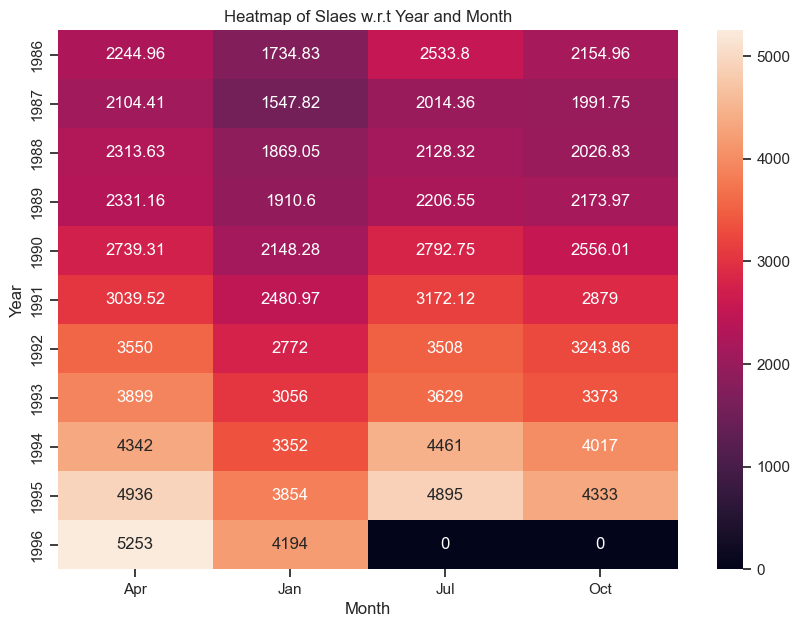

In [13]:
plt.figure(figsize=(10,7))
d_h = pd.pivot_table(data=data,values='Sales',index='Year',columns='Month',fill_value=0)
sns.heatmap(d_h,annot=True,fmt='g')
plt.title('Heatmap of Slaes w.r.t Year and Month')
plt.show()

<b>We can see there is increase in Sales every year and Q2 accounts for most sales every year

<b>DATA VISUALIZATION

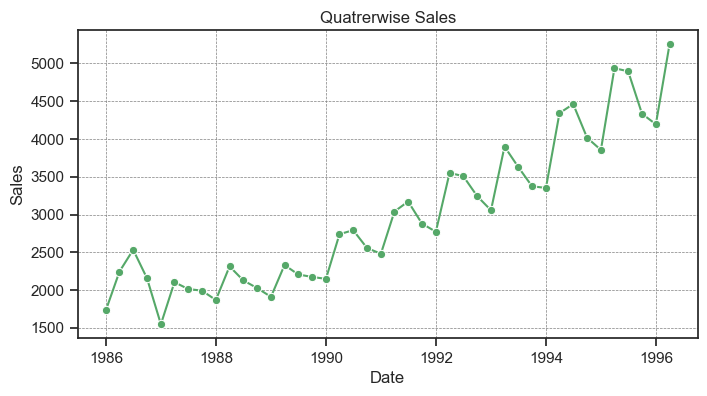

In [14]:
plt.figure(figsize=(8,4))
sns.lineplot(data=data,x='Date',y='Sales',marker='o',color='g')
plt.grid(color='gray',linestyle='--',linewidth=0.5)
plt.title('Quatrerwise Sales')
plt.show()

<b>There is a incresing trend every year but the sales in every Quarter in not same

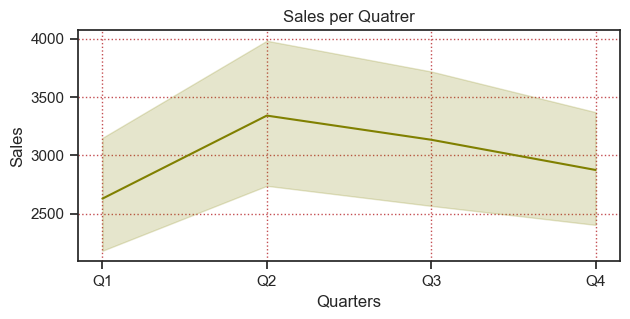

In [15]:
plt.figure(figsize=(7,3))
plt.grid(color='r',linestyle=':',linewidth=1)
sns.lineplot(data=data,x='Quarters',y="Sales",color='olive')
plt.title('Sales per Quatrer')
plt.show()

<b>Sales in Q2 is High because of Summer Season

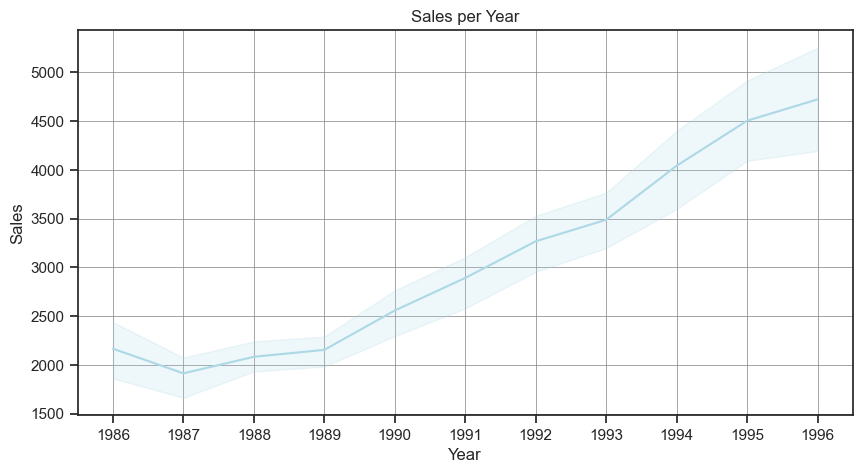

In [16]:
plt.figure(figsize=(10,5))
plt.grid(color='gray',linewidth='0.5')
sns.lineplot(data=data,x='Year',y='Sales',color='lightblue')
plt.title('Sales per Year')
plt.show()

<b>There is incraesing Trend every year

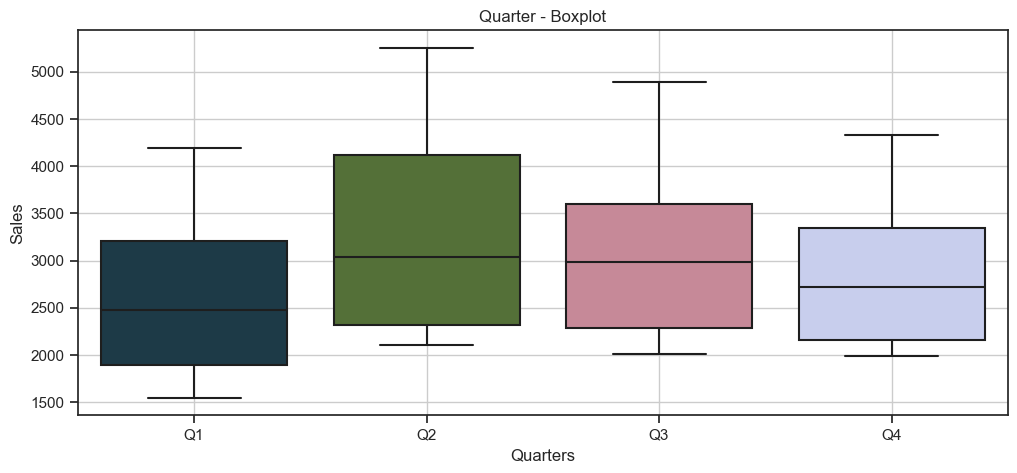

In [17]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data,x='Quarters',y="Sales",palette='cubehelix')
plt.title('Quarter - Boxplot')
plt.grid()
plt.show()

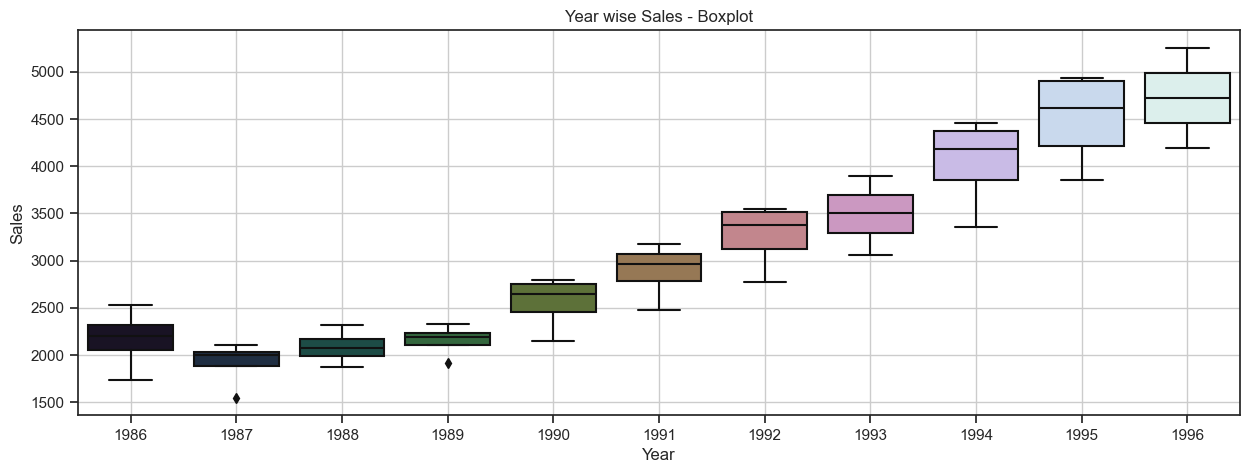

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x='Year',y="Sales",palette='cubehelix')
plt.title('Year wise Sales - Boxplot')
plt.grid()
plt.show()

<b>Some Outliers are seen in year 1987 and 1989

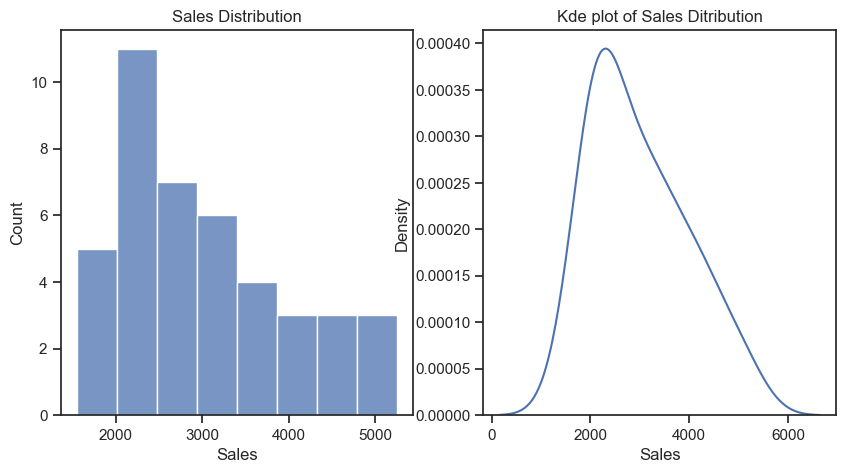

In [19]:
plt.subplots(figsize=(10,5),ncols=2)
plt.subplot(121)
sns.histplot(data['Sales'],bins=8)
plt.title('Sales Distribution')
plt.subplot(122)
sns.kdeplot(data['Sales'])
plt.title('Kde plot of Sales Ditribution')
plt.show()

<b><h2>Decomposition<br>
    
<b>Lets check trend , seasonality and residual of the time series data

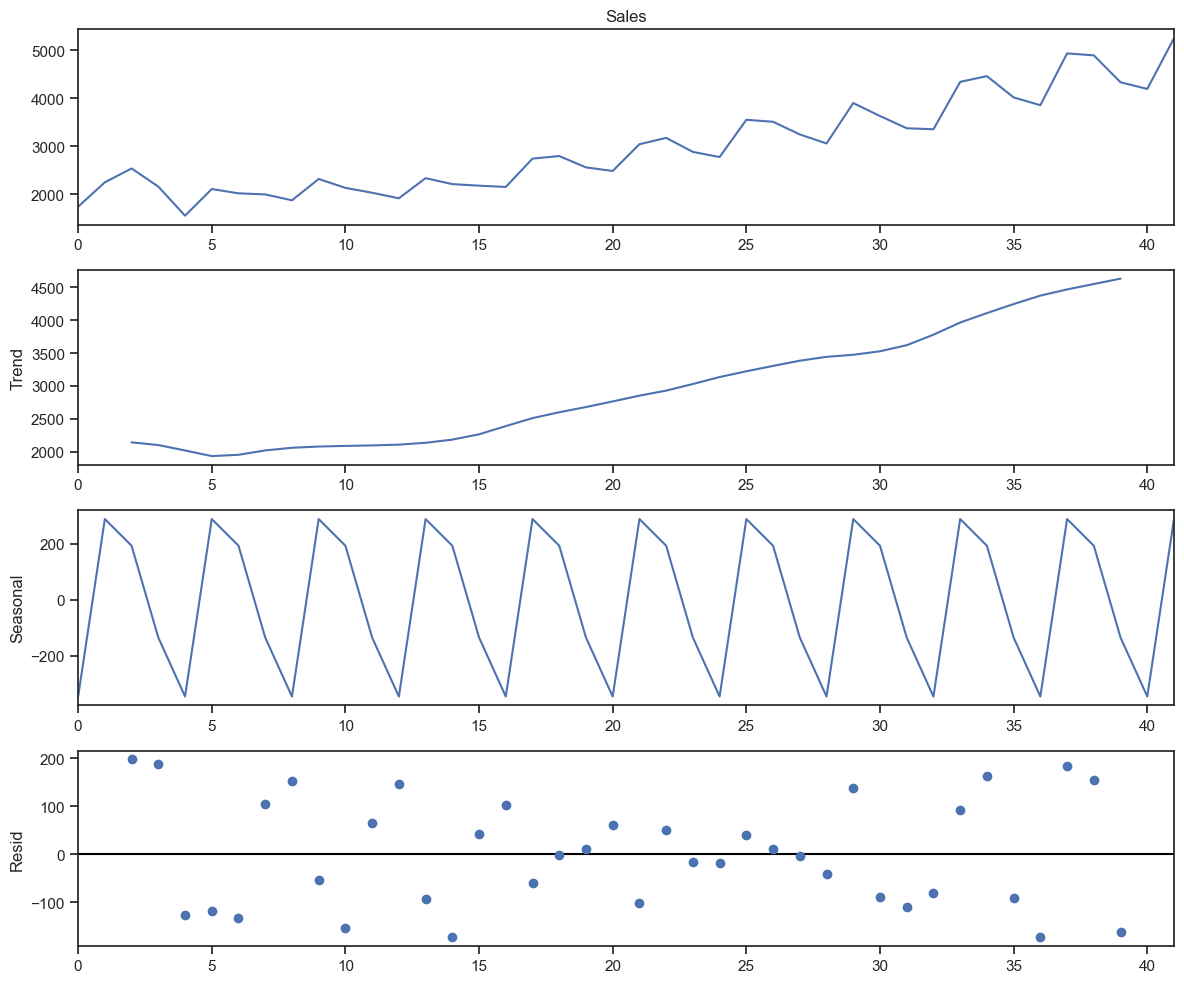

In [20]:
#Additive Seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data['Sales'],period=4)
with plt.rc_context():
    plt.rc('figure',figsize=(12,10))
    decompose.plot()
    plt.show()

<b>Trend is Uptrending with Seasionality varing from -360 to 300, Resid plot is not follwing any trend i.e it is random which is a good sign

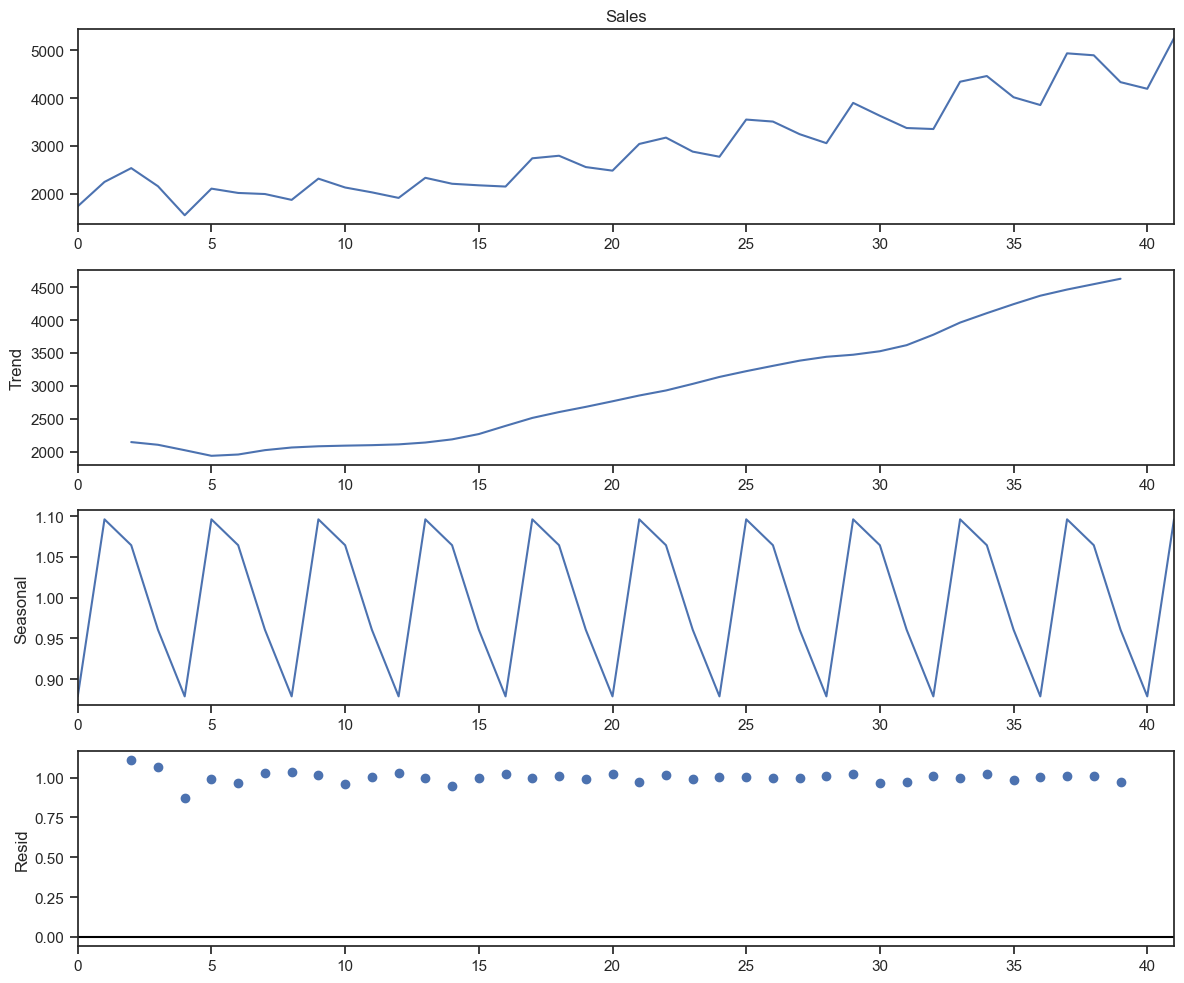

In [21]:
#Myltiplicative Sesonality
decompose_2 = seasonal_decompose(data['Sales'],period=4,model='multiplicative')
with plt.rc_context():
    plt.rc('figure',figsize=(12,10))
    decompose_2.plot()
    plt.show()

<b>Multiplicative Seasonality varies from 0.9 to 1.1

<b><h3>Moving average Plot

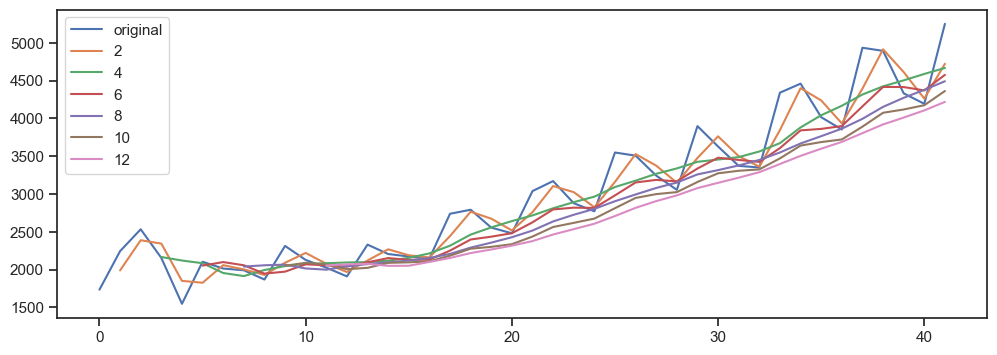

In [22]:
plt.figure(figsize=(12,4))
data['Sales'].plot(label='original')
for i in range(2,13,2):
    data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

<b>Auto Correlation and Partial Auto Correlation

In [23]:
import statsmodels.graphics.tsaplots as tsa_plots

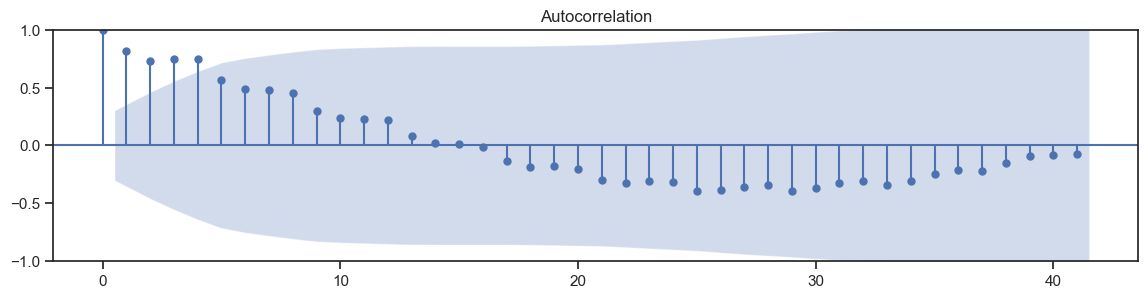

In [24]:
with plt.rc_context():
    plt.rc('figure',figsize=(14,3))
    tsa_plots.plot_acf(data['Sales'],lags=41)
    plt.show()

D:\Anaconda\Installation\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


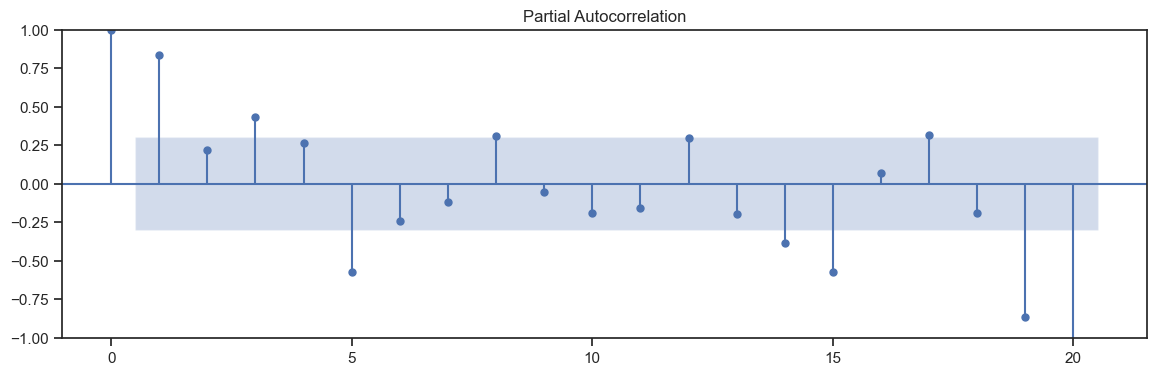

In [25]:
plt.rc('figure',figsize=(14,4))
tsa_plots.plot_pacf(data['Sales'],lags=20)
plt.show()

<b>Strong correlation at lag 0,1,3 &5<br>
<b>Significant partial correlation at lags 0,1,5

<b><h3>Data Interpolation/Upsampling

In [26]:
data_sample = data[['Date',"Sales"]]
data_sample['Date'] = pd.to_datetime(data_sample['Date'])
data_sample.set_index('Date',inplace=True)
data_sample

C:\Users\CSC\AppData\Local\Temp\ipykernel_13660\3452483676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['Date'] = pd.to_datetime(data_sample['Date'])


,Sales
Date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


In [27]:
data_sample = data_sample.resample('M').mean()
print(data_sample.head())

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN


In [28]:
data_inter = data_sample.interpolate(method='linear')
data_inter

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


<Axes: xlabel='Date'>

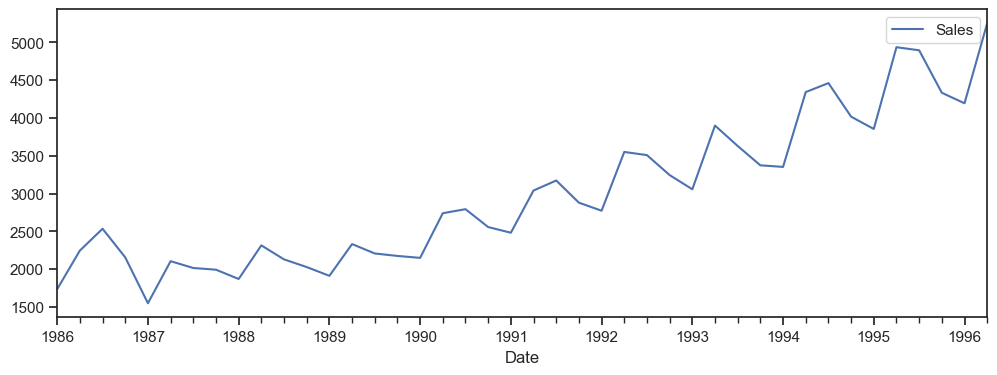

In [29]:
data_inter.plot(figsize=(12,4))

<b>Decomposition of interpolated data

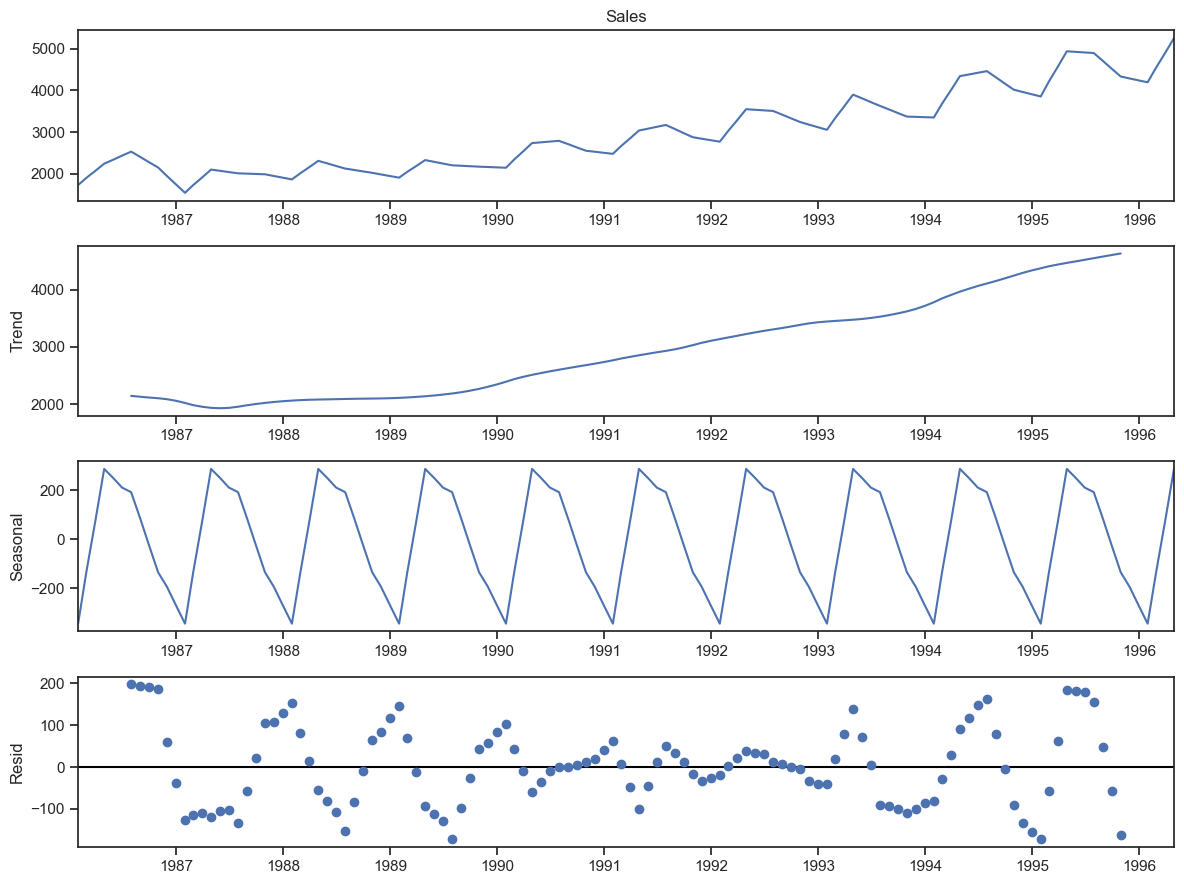

In [30]:
#Additive Seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_3 = seasonal_decompose(data_inter['Sales'],period=12)
plt.rc('figure',figsize=(12,9))
decompose_3.plot()
plt.show()

<b>Additive seasonality varies in between -260 t0 240

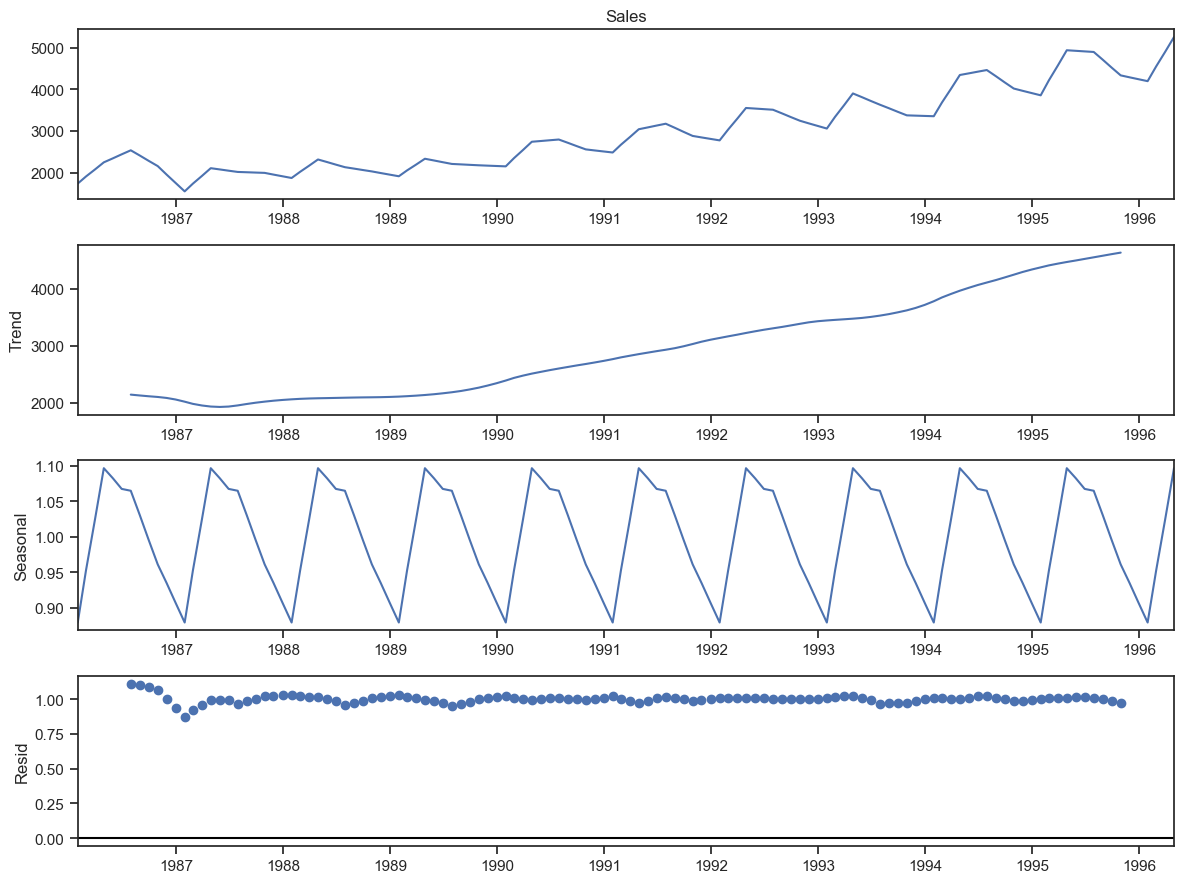

In [31]:
#Multiplicative Sesonality
decompose_4 = seasonal_decompose(data_inter['Sales'],period=12,model='multiplicative')
plt.rc('figure',figsize=(12,9))
decompose_4.plot()
plt.show()

<b>Multiplicative seasonality varies from .86 to 1.1

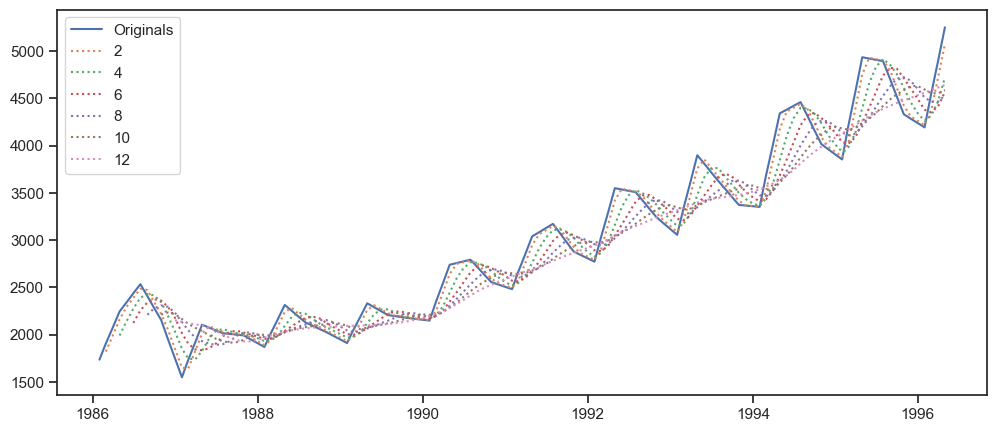

In [32]:
#Moving Average Plot
plt.figure(figsize=(12,5))
#data_inter['Sales'].plot(label='Original')
plt.plot(data_inter['Sales'],label='Originals')
for i in range(2,13,2):
    #data_inter['Sales'].rolling(i).mean().plot(label=str(i),linestyle='--')
    plt.plot(data_inter['Sales'].rolling(i).mean(),label=str(i),linestyle=':')
plt.legend(loc='best')
plt.show()

<b>Moving Aveage Plot is smoothened

<b>---After interpolation the the additive seasonality has reduced

In [33]:
#Split the Data
data_inter.shape

(124, 1)

In [34]:
data_train = data_inter[:104]
data_test = data_inter[104:]
print(data_train.shape)
print(data_test.shape)

(104, 1)
(20, 1)


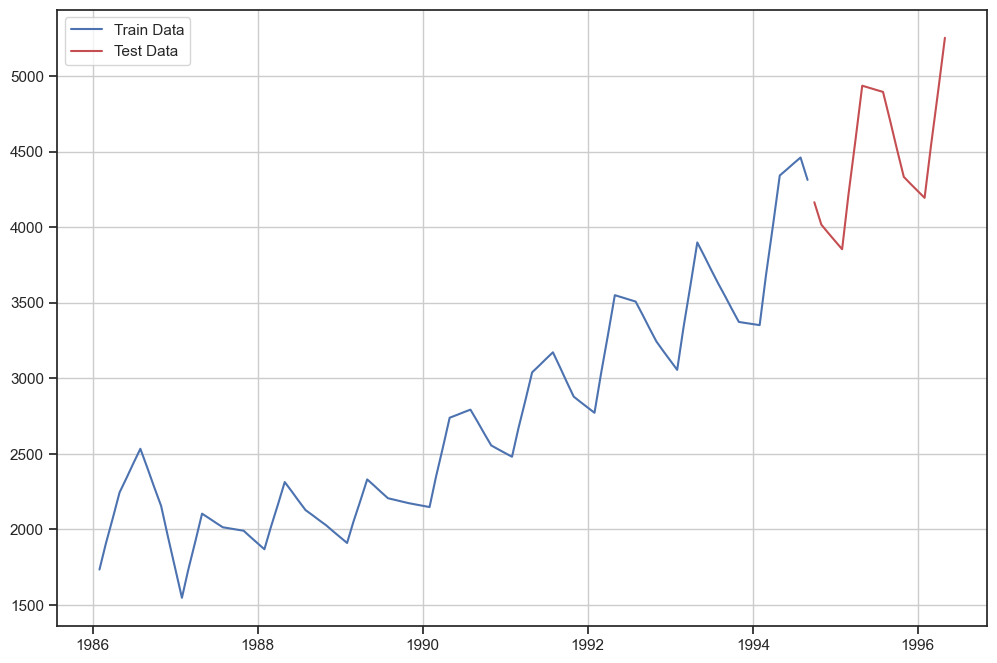

In [35]:
plt.figure(figsize=(12,8))
plt.plot(data_train,color='b',label='Train Data')
plt.plot(data_test,color='r',label='Test Data')
plt.grid()
plt.legend(loc='best')
plt.show()

<b><h2>MODEL BUILDING

In [36]:
#1. Simple Exponential Model
# first we will define f'n for MAPE
def MAPE(predicted,original):
    mape = np.abs((predicted-original)/original)*100
    return np.mean(mape)

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [38]:
model_1 = SimpleExpSmoothing(data_train['Sales']).fit(optimized=True)
pred_1 = model_1.forecast(20)
pred_1.shape

(20,)

In [39]:
from sklearn.metrics import mean_squared_error as MSE
rmse_1 = np.sqrt(MSE(pred_1,data_test["Sales"]))
print('RMSE :',rmse_1,'\n','MAPE :',MAPE(pred_1,data_test['Sales']))

RMSE : 426.3685394307282 
 MAPE : 7.636399017328024


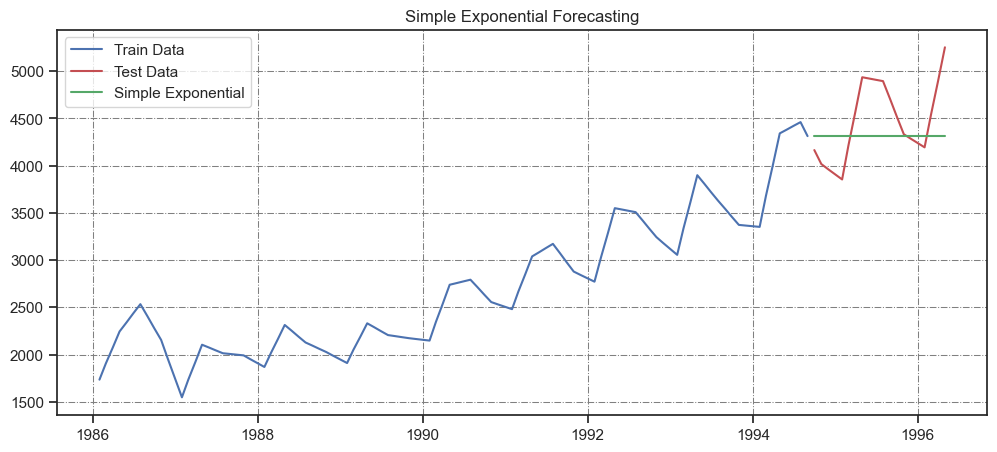

In [40]:
plt.figure(figsize=(12,5))
plt.plot(data_train,color='b',label='Train Data')
plt.plot(data_test,color='r',label='Test Data')
plt.plot(pred_1,color='g',label='Simple Exponential')
plt.title('Simple Exponential Forecasting')
plt.legend(loc='best')
plt.grid(color='gray',linestyle='-.',linewidth=0.75)
plt.show()

In [41]:
#2. Holts Method(Double Exponential),holts capture both level and trend
from statsmodels.tsa.holtwinters import Holt
model_2 = Holt(data_train).fit(optimized=True)
pred_2 = model_2.forecast(20)
pred_2.shape

(20,)

In [42]:
print('RMSE :',np.sqrt(MSE(data_test['Sales'],pred_2)),'\n','MAPE :',MAPE(data_test['Sales'],pred_2))

RMSE : 2040.555854029364 
 MAPE : 83.56112487229885


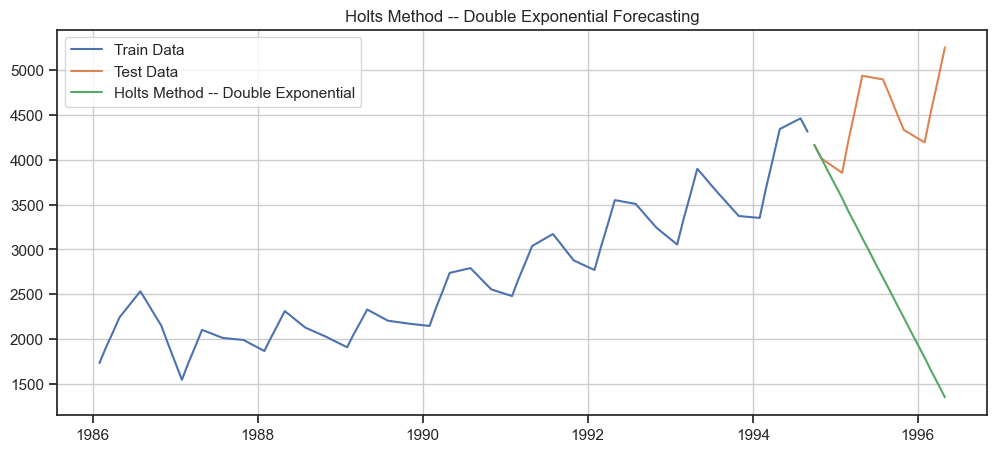

In [43]:
plt.figure(figsize=(12,5))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_2,label='Holts Method -- Double Exponential')
plt.title('Holts Method -- Double Exponential Forecasting')
plt.legend(loc='best')
plt.grid()
plt.show()

In [44]:
#Holts Winters Method (Triple Exponential) where Seasonality=Additive and Trend = Additive
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

In [45]:
model_3 = ES(data_train,seasonal='add',trend='add',seasonal_periods=12).fit(optimized=True)
pred_3 = model_3.forecast(20)
print(pred_3.shape)
print('RMSE :',np.sqrt(MSE(data_test,pred_3)),'\n','MAPE :',MAPE(data_test['Sales'],pred_3))

(20,)
RMSE : 999.2299492491784 
 MAPE : 24.617873431976243


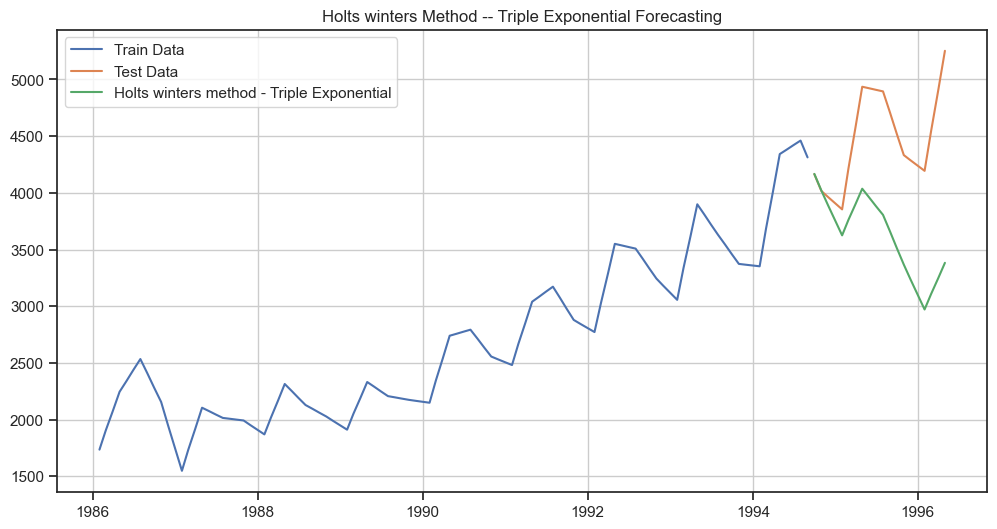

In [46]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_3,label='Holts winters method - Triple Exponential')
plt.title('Holts winters Method -- Triple Exponential Forecasting')
plt.grid()
plt.legend(loc='best')
plt.show()

In [47]:
#Holts Winters Method (Triple Exponential) where Seasonality=Multiplicative and Trend = Multiplicative
model_4 = ES(data_train,seasonal='mul',trend='mul',seasonal_periods=12).fit(optimized=True)
pred_4 = model_4.forecast(20)
print(pred_4.shape)
print('RMSE :',np.sqrt(MSE(data_test['Sales'],pred_4)),'\n','MAPE :',MAPE(data_test['Sales'],pred_4))

(20,)
RMSE : 415.54941623604543 
 MAPE : 8.893715943432232


D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


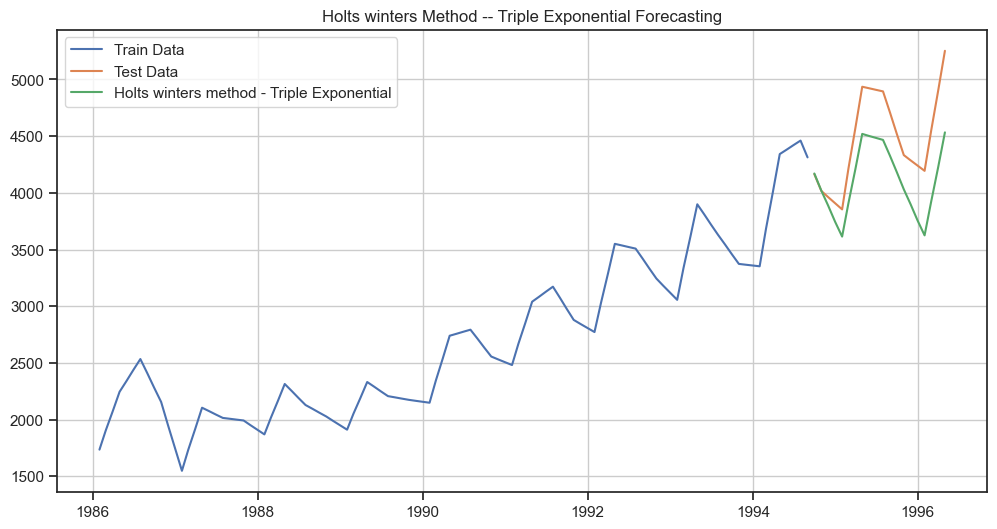

In [48]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_4,label='Holts winters method - Triple Exponential')
plt.title('Holts winters Method -- Triple Exponential Forecasting')
plt.grid()
plt.legend(loc='best')
plt.show()

In [49]:
#Holts Winters Method (Triple Exponential) where Seasonality=Additive and Trend = Multiplicative
model_5 = ES(data_train,seasonal='add',trend='mul',seasonal_periods=12).fit(optimized=True)
pred_5 = model_5.forecast(20)
print(pred_5.shape)
print('RMSE :',np.sqrt(MSE(data_test['Sales'],pred_5)),'\n','MAPE :',MAPE(data_test['Sales'],pred_5))

(20,)
RMSE : 1244.6685434938718 
 MAPE : 33.73916084741482


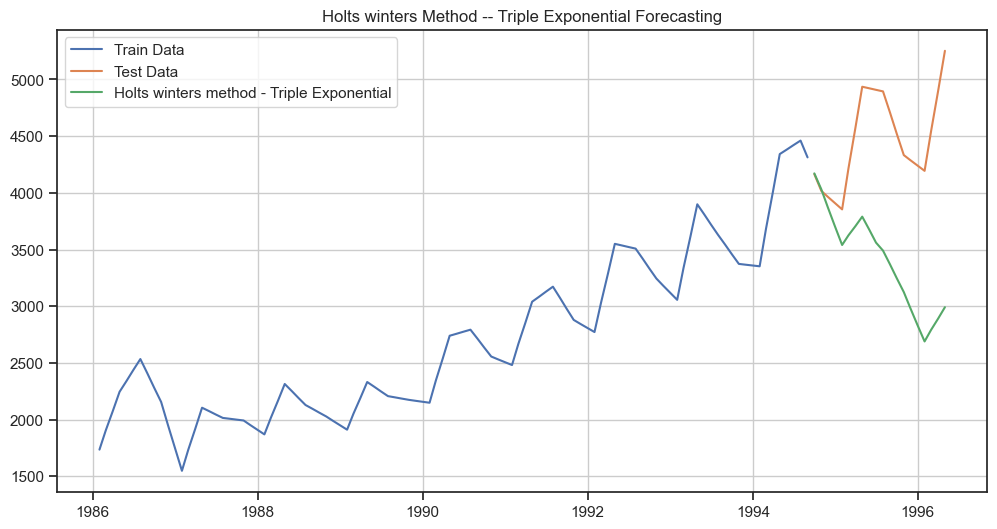

In [50]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_5,label='Holts winters method - Triple Exponential')
plt.title('Holts winters Method -- Triple Exponential Forecasting')
plt.grid()
plt.legend(loc='best')
plt.show()

In [51]:
#Holts Winters Method (Triple Exponential) where Seasonality=Multiplicative and Trend = Additive
model_6 = ES(data_train,seasonal='mul',trend='add',seasonal_periods=12).fit(optimized=True)
pred_6 = model_6.forecast(20)
print(pred_6.shape)
print('RMSE :',np.sqrt(MSE(data_test['Sales'],pred_6)),'\n','MAPE :',MAPE(data_test['Sales'],pred_6))

(20,)
RMSE : 421.0442112272251 
 MAPE : 9.038218723250548


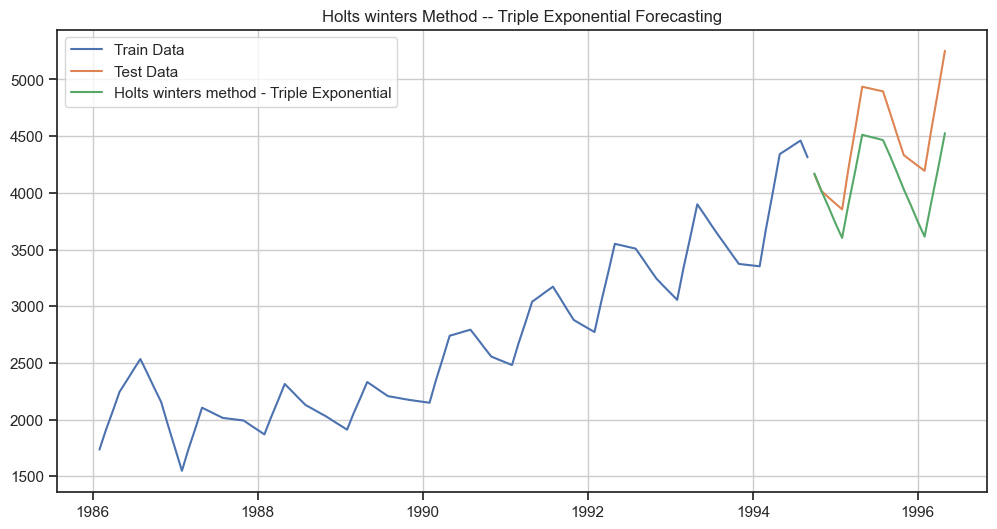

In [52]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_6,label='Holts winters method - Triple Exponential')
plt.title('Holts winters Method -- Triple Exponential Forecasting')
plt.grid()
plt.legend(loc='best')
plt.show()

<b><h3>ARIMA MODEL

D:\Anaconda\Installation\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


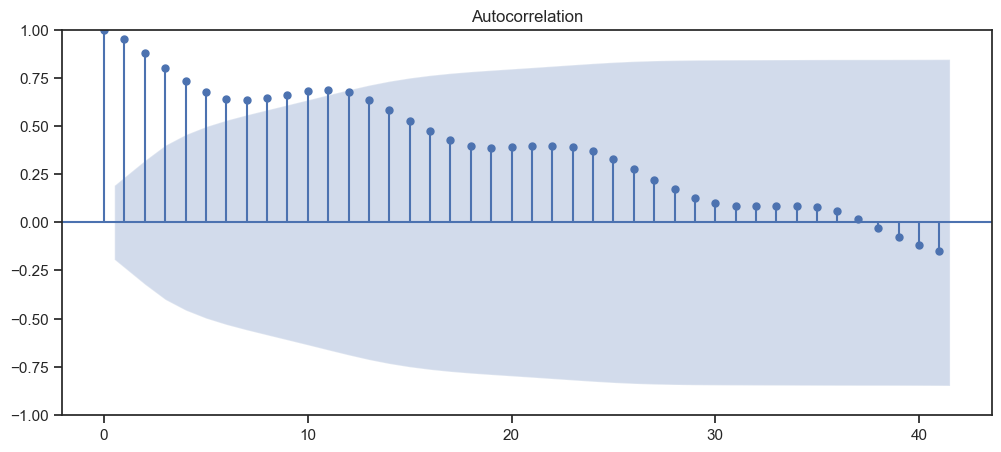

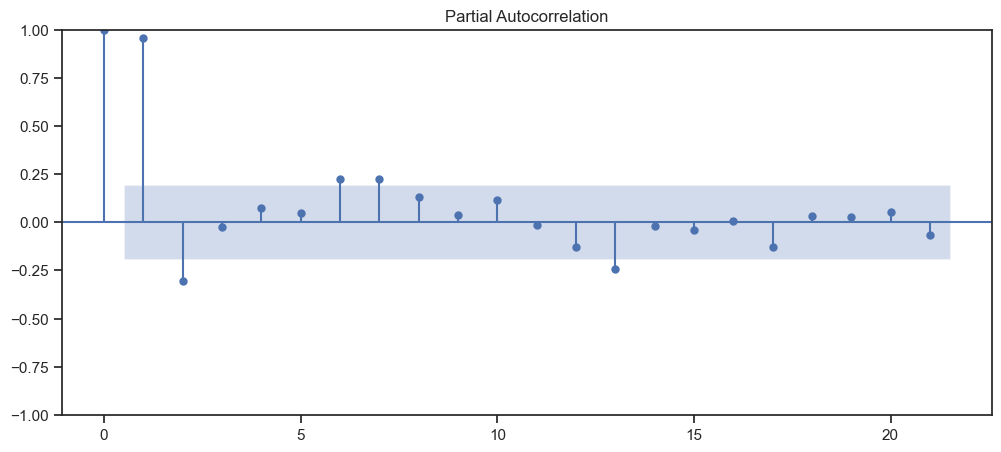

In [53]:
#Check for Stationarity
#Method 1. ACF & PACF Plots
plt.rc('figure',figsize=(12,5))
tsa_plots.plot_acf(data_train,lags=41)
plt.rc('figure',figsize=(12,5))
tsa_plots.plot_pacf(data_train,lags=21)
plt.show()

<b>Auto correlation is visible from the acf and pacf plots

In [54]:
#Method 2. AdFuller Test
from statsmodels.tsa.stattools import adfuller

In [55]:
adf_test = adfuller(data_train)
print('p_value :',adf_test[1])

p_value : 0.9947891124588888


<b>p_value=0.99>0.05..Hence non-stationary

Text(0.5, 1.0, '1st order Differentiated data')

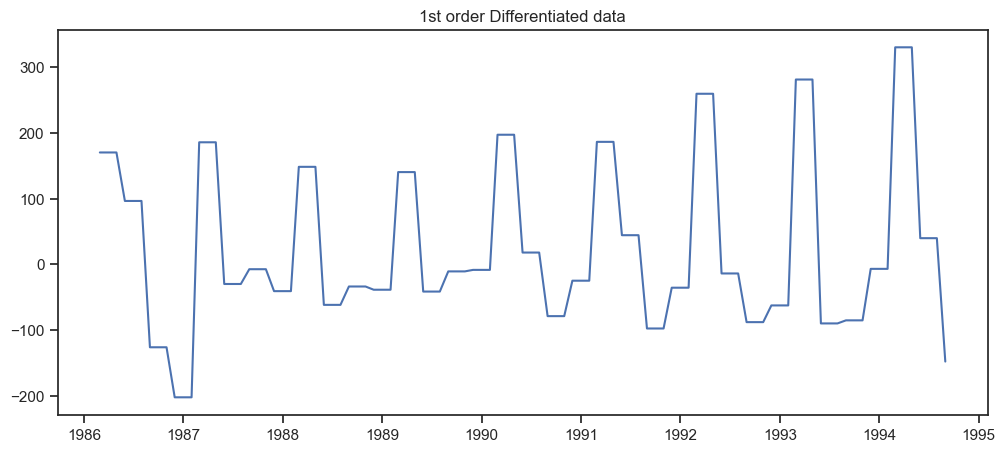

In [56]:
#Transformimg to Stationary
#Differencing
#Current value -previous value to find the new series
data_train_diff = data_train.diff().dropna()
plt.plot(data_train_diff['Sales'])
plt.title('1st order Differentiated data')

In [57]:
adf_test_2 = adfuller(data_train_diff)
print('p_value :',adf_test_2[1])

p_value : 0.3095878997246475


<b>P_value is still greater then 0.05, lets do one more trail

Text(0.5, 1.0, '2nd Order Differentiated Data')

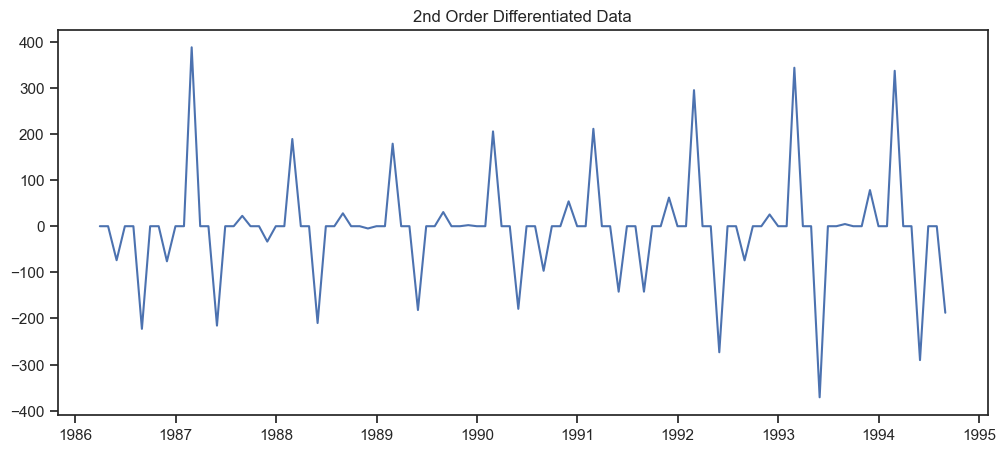

In [58]:
data_train_diff2 = data_train_diff.diff().dropna()
plt.plot(data_train_diff2['Sales'])
plt.title('2nd Order Differentiated Data')

In [59]:
adf_test_3 = adfuller(data_train_diff2)
print('p_value :',adf_test_3[1])

p_value : 0.0


<b>P_value is less than 0.05. Therefore Differentiation order =2

D:\Anaconda\Installation\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


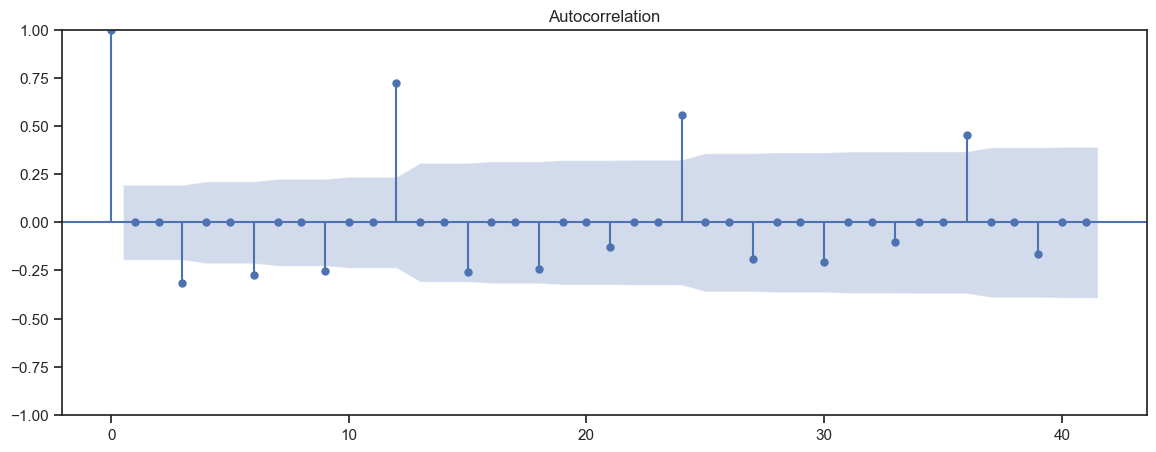

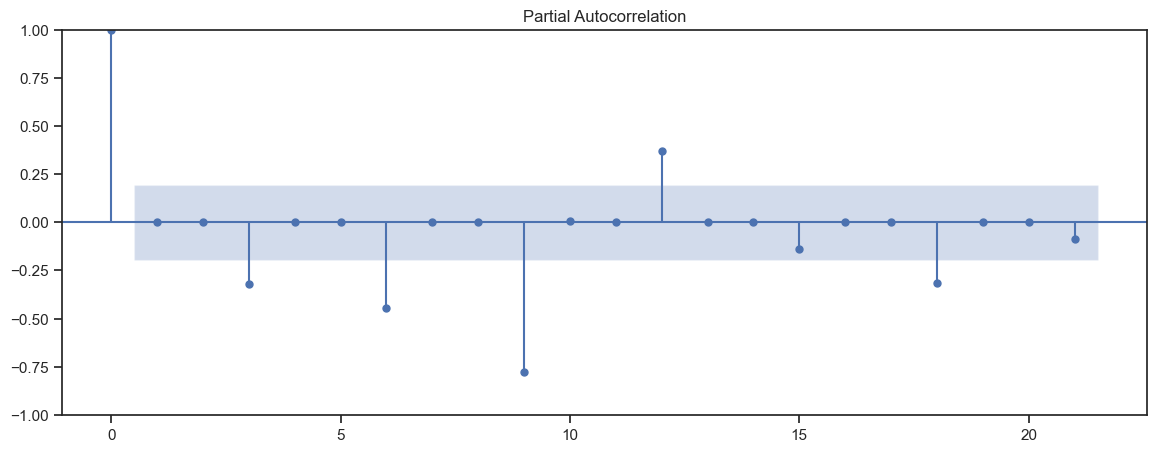

In [60]:
#Selection of p & q values for ARIMA Model from ACF and PCF plots (Rule of Thumb)
plt.rc('figure',figsize=(14,5))
tsa_plots.plot_acf(data_train_diff2,lags=41)
plt.rc('figure',figsize=(14,5))
tsa_plots.plot_pacf(data_train_diff2,lags=21)
plt.show()

<b>In ACF plot peaks at 1,3,6,9,12 and almost decay from there .Lets choose an optimum value p=6<br>
<b>In PACF plot it peaks at 3,6,9 and decays afterwards .Lets choose an optimum q of 9

In [61]:
from statsmodels.tsa.arima.model import ARIMA as AR

In [62]:
model_7  = AR((data_train['Sales']),order=(6,2,9)).fit()
pred_7 = model_7.forecast(20)
print(pred_7.shape)
print('RMSE :',np.sqrt(MSE(data_test['Sales'],pred_7)),'\n','MAPE :',MAPE(data_test['Sales'],pred_7))

D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(20,)
RMSE : 210.56693927846374 
 MAPE : 3.665663912171992


D:\Anaconda\Installation\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


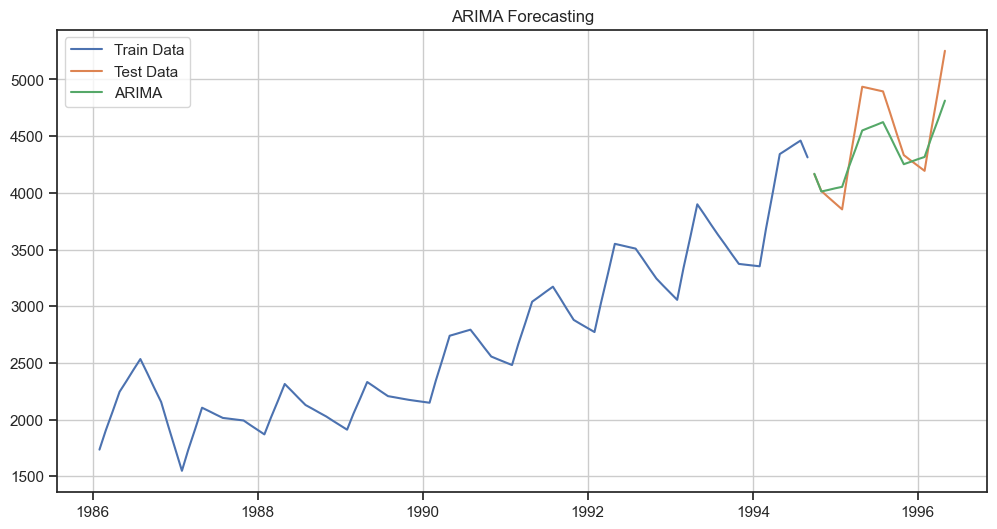

In [63]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_7,label='ARIMA')
plt.title('ARIMA Forecasting')
plt.grid()
plt.legend(loc='best')
plt.show()

<b><h3>SARIMA

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX as SA

In [65]:
model_8 = SA(data_train,order=(3,1,3),seasonal_order=(1,1,1,12)).fit()
pred_8 = model_8.forecast(20)
print(pred_8.shape)
print('RMSE :',np.sqrt(MSE(data_test['Sales'],pred_8)),'\n','MAPE :',MAPE(data_test['Sales'],pred_8))

(20,)
RMSE : 95.06675089182448 
 MAPE : 1.6168843548333343


D:\Anaconda\Installation\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


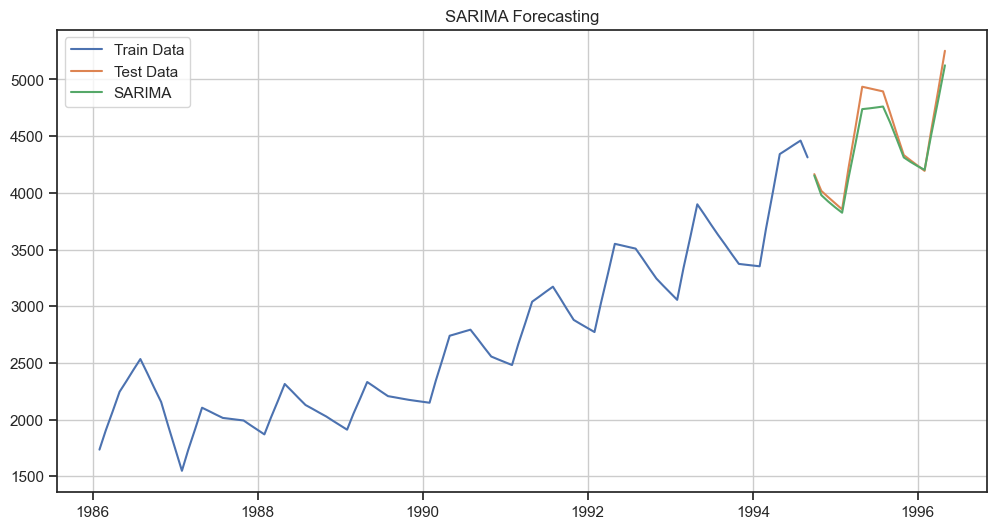

In [66]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_8,label='SARIMA')
plt.title('SARIMA Forecasting')
plt.grid()
plt.legend(loc='best')
plt.show()

<b>SARIMA Model gives appreciable MAPE and RMSE value<br>
<b>Also catches seasonality and trend

In [67]:
#Comparison of model performances
df_metric=pd.DataFrame({'Forecasting Model':['Simple Exponential','Holts','Holt-Winters1','Holt-Winters2','Holt-Winters3',
                                   'Holt-Winters4','ARIMA','SARIMA'],'RMSE':[np.sqrt(MSE(data_test['Sales'],pred_1)),
                                                                             np.sqrt(MSE(data_test['Sales'],pred_2)),
                                                                             np.sqrt(MSE(data_test['Sales'],pred_3)),
                                                                             np.sqrt(MSE(data_test['Sales'],pred_4)),
                                                                             np.sqrt(MSE(data_test['Sales'],pred_5)),
                                                                             np.sqrt(MSE(data_test['Sales'],pred_6)),
                                                                             np.sqrt(MSE(data_test['Sales'],pred_7)),
                                                                             np.sqrt(MSE(data_test['Sales'],pred_8))],
                        'MAPE':[MAPE(data_test['Sales'],pred_1),
                                MAPE(data_test['Sales'],pred_2),
                                MAPE(data_test['Sales'],pred_3),
                                MAPE(data_test['Sales'],pred_4),
                                MAPE(data_test['Sales'],pred_5),
                                MAPE(data_test['Sales'],pred_6),
                                MAPE(data_test['Sales'],pred_7),
                                MAPE(data_test['Sales'],pred_8)]})
                                                                
df_metric

,Forecasting Model,RMSE,MAPE
0,Simple Exponential,426.368539,8.146284
1,Holts,2040.555854,83.561125
2,Holt-Winters1,999.229949,24.617873
3,Holt-Winters2,415.549416,8.893716
4,Holt-Winters3,1244.668543,33.739161
5,Holt-Winters4,421.044211,9.038219
6,ARIMA,210.566939,3.665664
7,SARIMA,95.066751,1.616884


<b><h2>Summary :<br>
    
<b>1. ARIMA , SARIMA & Holt-Winters Exponential Model (seasoning='multiplicative' ,trend='additive') are exhibitting better performance measures RMSE and MAPE<br>

<b>2. Eventhough SARIMA and ARIMA are performing better than Holt-Winters model the models are more complex<br>

<b>3. All the three models are able to catch the trend and seasonality<br>

<b>4. SARIMA Model is chosen as the best model with MAPE=2 ,RMSE=95<br>